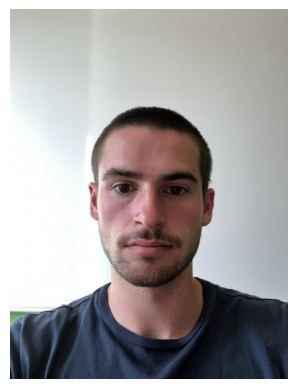

In [1]:
import numpy as np
import matplotlib
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image_path = '/Users/benbaize/Desktop/CSCI507/IMG_5088.jpeg'  # Update this with the actual file path
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.show()



In [62]:
filter = np.array([((-1,-1,-1),(-2,-2,-2),(-1,-1,-1)),((0,0,0),(0,0,0),(0,0,0)),((1,1,1),(2,2,2),(1,1,1))])
image_array = np.array(image)
x_len = np.shape(image_array)[1]
y_len = np.shape(image_array)[0]

In [63]:
print(np.shape(image_array))
print(image_array[0][0])
print(type(x_len))
print(filter)

(1024, 768, 3)
[186 189 182]
<class 'int'>
[[[-1 -1 -1]
  [-2 -2 -2]
  [-1 -1 -1]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 1  1  1]
  [ 2  2  2]
  [ 1  1  1]]]


In [64]:
filtered_image = np.empty([y_len,x_len,3])

for i in range(1, y_len-1):  
    for j in range(1, x_len-1):
        px_grid = np.array([
            [image_array[i-1, j-1], image_array[i, j-1], image_array[i+1, j-1]],
            [image_array[i-1, j],   image_array[i, j],   image_array[i+1, j]],
            [image_array[i-1, j+1], image_array[i, j+1], image_array[i+1, j+1]]
        ])
        
        new_px = np.sum(np.tensordot(px_grid, filter, axes=([0, 1], [0, 1])), axis=(0, 1))
        
        filtered_image[i, j] = new_px

In [65]:
print(np.shape(filtered_image))
print(np.shape(px_grid))
print(np.shape(filter))

(1024, 768, 3)
(3, 3, 3)
(3, 3, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


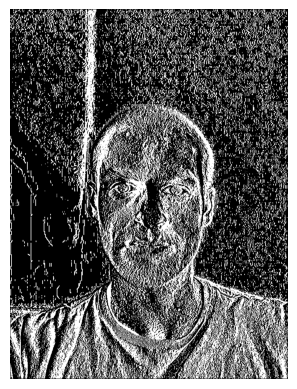

In [66]:
plt.imshow(filtered_image)
plt.axis('off')  # Turn off axis labels
plt.show()